In [1]:
import glob as glob
import numpy as np
from lattice_translocators import LEFTranslocator, LEFTranslocatorDynamicBoundary
import matplotlib.pylab as plt
import cooltools
import cooltools.lib.plotting
import pandas as pd
import h5py 
import os
import time
import sys
import warnings
import seaborn as sns
import ast

/home1/rahmanin/.conda/envs/openmm-env/lib/python3.7/site-packages/cooltools/lib/numutils.py:11: FutureWarning: The `cooler.tools` module is deprecated in v0.9 and will be removed in v0.10. Use `cooler.parallel` instead.
  from ._numutils import (
/home1/rahmanin/.conda/envs/openmm-env/lib/python3.7/site-packages/cooltools/api/expected.py:14: FutureWarning: The `cooler.tools` module is deprecated in v0.9 and will be removed in v0.10. Use `cooler.parallel` instead.
  from cooler.tools import partition


In [2]:
# Define parameters

In [2]:
DeltaCTCFRange = 19000
BaseLoad = 0.0001
unique_occup = [0.5, 0.7, 0.9]
SiteSize=0.25 

In [ ]:
# both ctcfs have similar occupancies

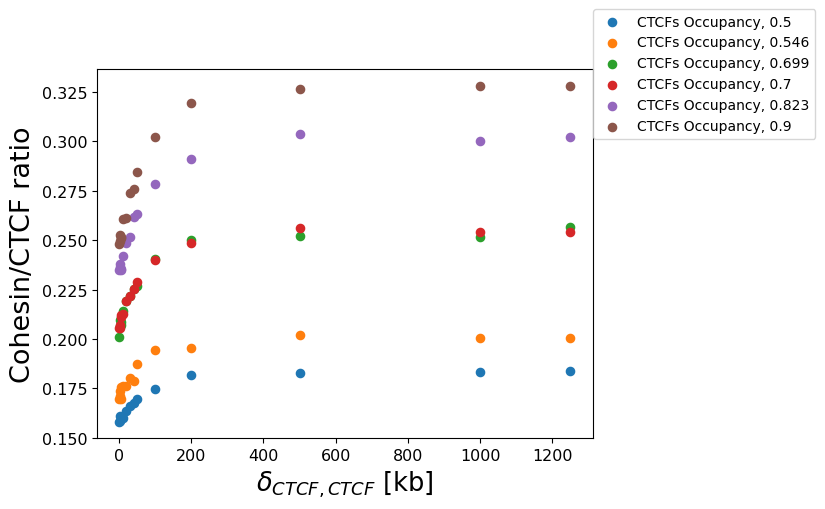

In [3]:
file = pd.read_csv('data/merged_frip_both.csv') # this file includes simulations where both ctcf change occupancy
file=file[(file['life']==66)&(file['sep']==74)]
file['birthp']=(file['birth']/BaseLoad).astype(int)
file = file[file['birthp']==1]
file = file[file['deltactcf']<19000]
file['deltactcf']=file['deltactcf']*SiteSize/2
birth = file['birth']
deltactcf = file['deltactcf']
unique_birth=np.unique(birth)
unique_deltactcf = np.unique(deltactcf)
unique_cof = np.unique(file['cof'])
file = file[file['clife']==17.0]
file ['occup']=(file['clife']/(file['clife']+file['cof'])).round(3)
file = file.query('occup>0.4')
unique_occup = np.unique(file['occup'])
unique_dch = np.unique(file['deltacoh'])
for dch_val in unique_dch:
    for occup_val in unique_occup:
        new_file = file[(file['occup']==occup_val)&(file['deltacoh']==dch_val)]
        plt.scatter(new_file['deltactcf'],new_file['reads_c']/new_file['ctcf_reads_c'],s=35, label='CTCFs Occupancy, %s'%occup_val)
        # Customize 
        plt.xlabel(r'$\delta_{CTCF, CTCF}$ [kb]', fontsize = 18.5)
        plt.xticks(fontsize =11.5)
        plt.ylabel('Cohesin/CTCF ratio', fontsize =19.5)
        plt.yticks(fontsize=11.5, rotation=0)
        #plt.xscale('log')
        plt.legend(loc=(1,0.81))
    plt.show()

In [5]:
# Varying the front occupancy

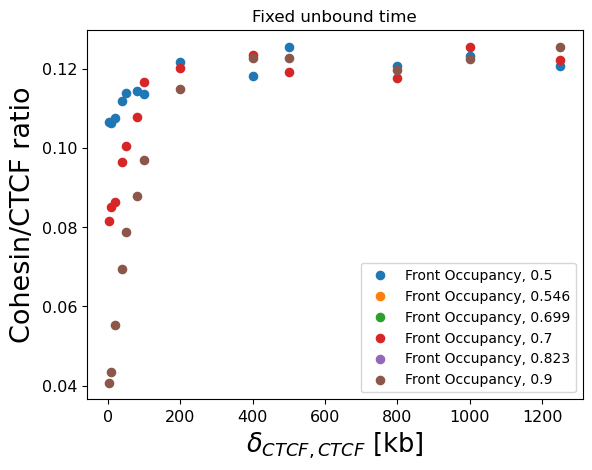

In [4]:
file = pd.read_csv('data/merged_frip_front.csv')
file['birthp']=(file['birth']/BaseLoad).astype(int)
file = file[file['birthp']==1]
file['deltactcf']=file['deltactcf']*SiteSize/2   
file = file[file['cof']==17.0]
file ['occup']=(file['clife']/(file['clife']+file['cof'])).round(2)
file = file.query('occup>0.4')
unique_dch = np.unique(file['deltacoh'])
#unique_occup = np.unique(file['occup'])
file = file[file['deltactcf']>2]
for dch_val in unique_dch:
    for occup_val in unique_occup:
        new_file = file[(file['occup']==occup_val)&(file['deltacoh']==dch_val)]
        plt.scatter(new_file['deltactcf'],new_file['reads_c']/new_file['ctcf_reads_c'],s=35, label='Front Occupancy, %s'%occup_val)
        # Customize 
        plt.title('Fixed unbound time')
        plt.xlabel(r'$\delta_{CTCF, CTCF}$ [kb]', fontsize = 18.5)
        plt.xticks(fontsize =11.5)
        #plt.xscale('log')
        plt.legend()
        plt.ylabel('Cohesin/CTCF ratio', fontsize =19.5)
        plt.yticks(fontsize=11.5, rotation=0)
    
    plt.savefig('frip_vs_distance_sequential.pdf', bbox_inches = 'tight')
    plt.show()